<a href="https://colab.research.google.com/github/anuravi98/fastai-notebooks/blob/master/planets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *

In [0]:
from fastai.vision import *


In [0]:
planet = untar_data(URLs.PLANET_TINY)
planet_tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)


In [0]:
data = (ImageList.from_csv(planet, 'labels.csv', folder='train', suffix='.jpg')
        .split_by_rand_pct()
        .label_from_df(label_delim=' ')
        .transform(planet_tfms, size=128)
        .databunch()
        .normalize(imagenet_stats))


In [0]:
learn = cnn_learner(data, models.resnet18)
learn.fit_one_cycle(5,1e-2)
learn.save('mini_train')

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:00<00:00, 66811504.96it/s]


epoch,train_loss,valid_loss,time
0,0.833018,0.700301,00:01
1,0.793355,0.698066,00:00
2,0.748201,0.630874,00:00
3,0.697848,0.590952,00:00
4,0.658399,0.563359,00:00


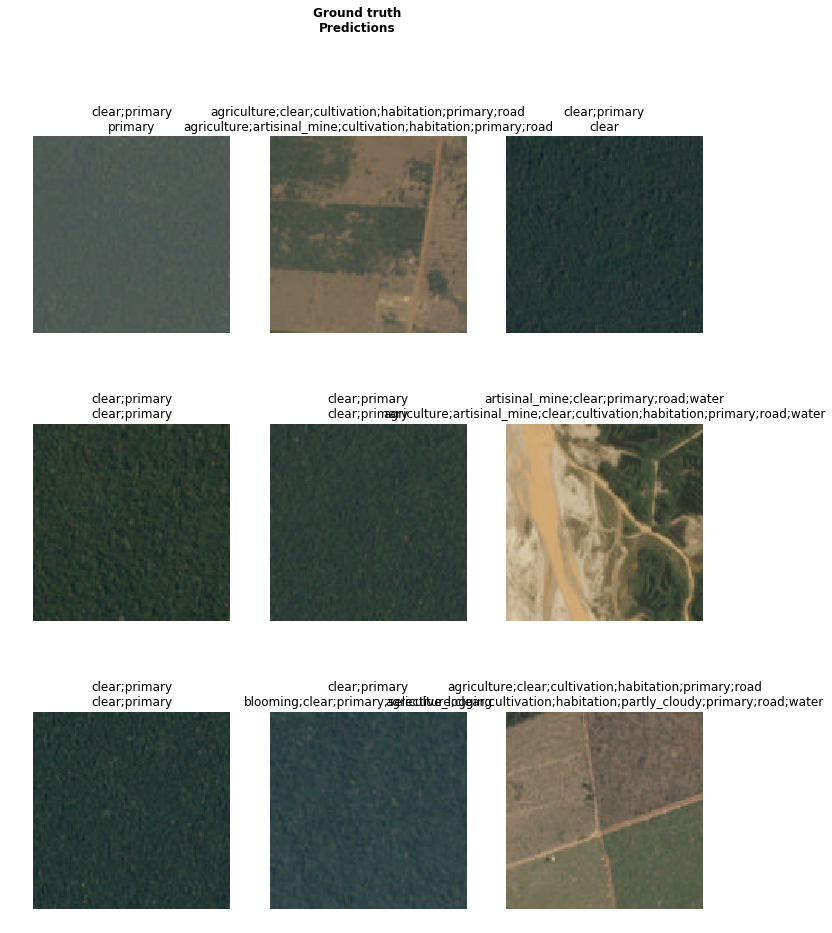

In [0]:
learn.show_results(rows=3, figsize=(12,15))


In [0]:
arch = models.resnet50


In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:05<00:00, 18389518.88it/s]


In [0]:
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


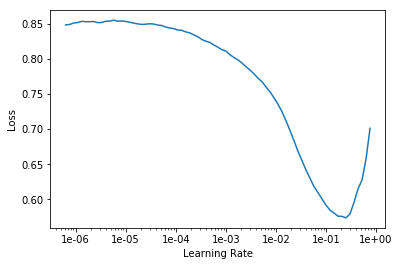

In [0]:
learn.recorder.plot()


In [0]:
lr = 0.001
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.499806,0.559568,0.321429,0.583341,00:01
1,0.499499,0.537227,0.321429,0.580802,00:00
2,0.496970,0.518376,0.325000,0.583230,00:00
3,0.485731,0.508976,0.332143,0.586769,00:00
4,0.481316,0.505101,0.337500,0.588066,00:00


In [0]:
learn.save('stage-1-rn50')


In [0]:
learn.unfreeze()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


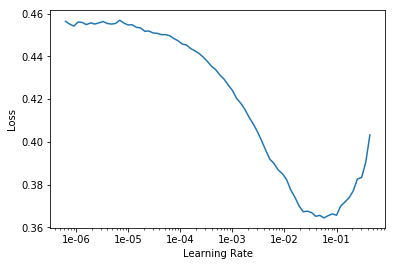

In [0]:
learn.lr_find()
learn.recorder.plot()


In [0]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.465801,0.502837,0.341071,0.589891,00:01
1,0.460276,0.500493,0.335714,0.585123,00:00
2,0.458212,0.499238,0.337500,0.585795,00:01
3,0.455402,0.495413,0.342857,0.588152,00:01
4,0.449547,0.492844,0.339286,0.590248,00:01
